## Gradient Boosting Classifier


In this challenge, we’ll use Gradient Boosting to classify tumors. We'll assume that tumors can be benign or malignant. To make this exercise, we'll use the dataset from the scikit-learn API.

In [11]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

## Visualize the data

As usual, try to get more comfortable with the data and try to understand the meaning of each feature (column) and have a look at the target column. Also you should try to make some plots to visualize the data.

Answer the following questions : 
1. what is the type of each column (for the features)
2. how many features do we have for each sample?
3. how many samples do we have in the dataset?
4. Is this a classification or regression problem? If classification, what are the different categories?
5. How many malignant tumors do we have in the dataset?
6. How many benign?

In [20]:
# shape / dtypes

y.value_counts()

[malignant, malignant, malignant, malignant, malignant, ..., malignant, malignant, malignant, malignant, benign]
Length: 569
Categories (2, object): [malignant, benign]

## Split and "clean" the data

As you should have noticed, the target is a **categorical feature**. So we should start by convert this categories into numbers, using the `LabelEncoder` class of scikit learn. For this problem, we’ll set malignant to 1 and benign to 0.

In [ ]:
# value_counts

Split the data into 60/40 between training and test sets thanks to **train_test_split** from scikit learn. Add the option `random_state=1`

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
encoder.fit(y)

binary_encoded_y = encoder.transform(y)
#binary_encoded_y.value_counts()

Xtrain, Xtest, ytrain, ytest = train_test_split(X,binary_encoded_y,test_size=0.4,random_state=1)

## Create, train, predict and measure with Gradient Boosting

You should be familiar with these steps by now : 
- initialize your model
- train ("fit") your model on the training data
- make predictions on the test data
- evaluate the performance of your model

We will use max_depth=1. As we explained before, we want weak (but fast) learner. max_depth=1 is a good way to do that. Basically we tell our model that we’d like our forest to be composed of trees with a single decision node and two leaves. 

**quick reminder**: n_estimators specifies the number of trees in our forest.

For this part of the exercise, you have to: 
- create an instance of GradientBoostingClassifier apply on a DecisionTreeClassifier with max_depth=1 and 50 trees in your forest
- train your classifier on the training data
- predict whether a tumor is malignant or benign on the test set
- evaluate the model using a **confusion matrix**. Note : do not use this method blindly. False Positive, True Negative,... are an important concept in machine learning.



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


clf = GradientBoostingClassifier(n_estimators=50)
clf.fit(Xtrain,ytrain)

ypred = clf.predict(Xtest)
confusion_matrix(ytest,ypred )

array([[143,   5],
       [  6,  74]])

Could you answer these questions : 
1. How many false positive do we have? How does that translate in that context?
2. How many false negative do we have? How does that translate in that context?
3. How many true negative do we have? How does that translate in that context?
4. What are the index(es) of the false positive? 



In [31]:
Xtest[(ytest == 0) & (ypred == 1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,...,18.22,28.07,120.30,1032.0,0.08774,0.1710,0.1882,0.08436,0.2527,0.05972
291,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.3429,0.2512,0.13390,0.2534,0.07858
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,...,15.53,23.19,96.66,614.9,0.15360,0.4791,0.4858,0.17080,0.3527,0.10160
526,13.46,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,15.35,25.16,101.90,719.8,0.16240,0.3124,0.2654,0.14270,0.3518,0.08665


## Optimise further our classifier

### Find the number of optimal trees

We can plot the number of estimators needed to get the best performance for our current problem. You should see when the error gets asymptotical by plotting increasing number of trainings.

**Plot the training error for the Gradient Boosting in function of the number of trees to find the optimal number of trees needed**

Hint: you can access to those submodels training through the `staged_predict` method of Gradient Boosting class

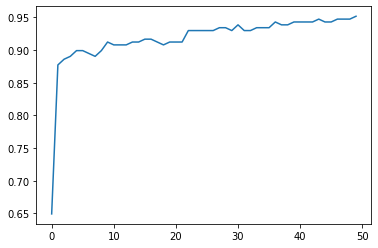

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_preds = []
for i, y_pred in enumerate(clf.staged_predict(Xtest)):
    y_preds.append(accuracy_score(ytest, y_pred))
    
plt.plot(y_preds)

We can feed this classifier to a logistic regression in order to improve the decision. Each leaf position is gonna be the new feature for our samples, as what is called a "one-hot" encoding.

**first, import [the one-hot encoding preprocessing method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from scikit learn and look at what it does**

In [50]:
from sklearn.preprocessing import OneHotEncoder

Then, look at [the `apply` method of the gradient boosting class](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier.apply)

The idea is to use this `apply` method to get new features, that we can encode with the one hot encoder method. Because it's a binary classifier, you'll need to extract the leaves index for one class only. 

Like this: `classifier.apply(train_X)[:, :, 0]`

**Create a hot encoder, fit it to the training set classification of our gradient boosting model.**

In [61]:
ohe = OneHotEncoder(categories='auto')
ohe.fit(clf.apply(Xtrain)[:, :, 0])

Xtrain_enc = ohe.transform(clf.apply(Xtrain)[:, :, 0])

**You can now encode both our training and testing set**

In [62]:
Xtest_enc = ohe.transform(clf.apply(Xtest)[:, :, 0])

**We can use those new hot encoded features as an input for a logistic regression model. Look at the performance of this new metaclassification**

In [75]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(Xtrain_enc, ytrain)

ypred = lg.predict(Xtest_enc)

clf.score(Xtest, ytest)
#lg.score(Xtest_enc, ytest)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9517543859649122

This additional prediction layer can be useful for more complex modelisation problems

## ROC Curve

ROC curves are extensively used for classification problems.

**You can plot both ROC curves zoomed out on the decision area [to plot de ROC curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)**

Hint: it's False Positive Rate (FPR) on the X-axis and True Positive Rate on the Y-axis
Hint2: use the `xlim` and `ylim` properties to zoom in the zone of interest

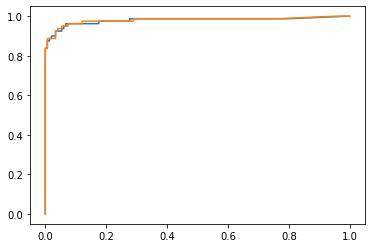

In [85]:
from sklearn.metrics import roc_curve

yscore = clf.decision_function(Xtest)
yscore_lg = lg.decision_function(Xtest_enc)

fpr1, tpr1, _ = roc_curve(ytest, yscore)
fpr2, tpr2, _ = roc_curve(ytest, yscore_lg)

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)

NB: Here we have nearly similar results because the dataset is small but encoding new features from a boosting classifier to feed another simpler estimator can be very powerful!